Classification Kaggle Template

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
#Load in Data
train_data = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Final\Classification\CAH-201803-train.csv")
train_data.head()

,id_num,Q1,Q2,political_affiliation,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,1,Male,53,Independent,Liberal,College degree,Black,No,No,No,"Yes, somewhat religious",Pro-Choice,No,No,Behave no differently,5,2,5,No
1,5,Female,66,Independent,Conservative,Some college,White,Yes,No,Yes,"Yes, very religious",Pro-life,Yes,Yes,Less Willing,4,5,4,No
2,7,Female,58,Democrat,Liberal,College degree,White,No,No,No,"Yes, very religious",Pro-Choice,No,No,Behave no differently,5,1,4,Yes
3,8,Male,55,Independent,Moderate,High school or less,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-life,Yes,Yes,Less Willing,4,5,4,Yes
4,9,Male,64,Republican,Conservative,High school or less,White,Yes,Yes,Yes,No,Pro-life,No,No,Behave no differently,5,1,1,Yes


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_num                 169 non-null    int64 
 1   Q1                     169 non-null    object
 2   Q2                     169 non-null    int64 
 3   political_affiliation  169 non-null    object
 4   Q4                     169 non-null    object
 5   Q5                     169 non-null    object
 6   Q6                     169 non-null    object
 7   Q7                     169 non-null    object
 8   Q8                     169 non-null    object
 9   Q9                     169 non-null    object
 10  Q10                    169 non-null    object
 11  Q11                    169 non-null    object
 12  Q12                    169 non-null    object
 13  Q13                    169 non-null    object
 14  Q14                    169 non-null    object
 15  Q15                    

In [5]:
# Convert columns to categorical as needed
categorical_columns = train_data.columns.drop(['id_num', 'Q2'])
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

train_data.dtypes

id_num                      int64
Q1                       category
Q2                          int64
political_affiliation    category
Q4                       category
Q5                       category
Q6                       category
Q7                       category
Q8                       category
Q9                       category
Q10                      category
Q11                      category
Q12                      category
Q13                      category
Q14                      category
Q15                      category
Q16                      category
Q17                      category
Q18                      category
dtype: object

In [6]:
X = train_data.drop(["political_affiliation","id_num"],axis=1)
y = train_data["political_affiliation"]

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=['category','object'])), 
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

In [11]:
#LDA
lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("LDA", LinearDiscriminantAnalysis())
    ]
)

lda_model = lda_pipeline.fit(X,y)
scores_lda = cross_val_score(lda_pipeline, X, y, cv=5, scoring='accuracy')
lda_acc = scores_lda.mean()
print(f"LDA Accuracy Score:",lda_acc)

LDA Accuracy Score: 0.6215686274509804


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# RF Tuning
rf_pipeline = Pipeline([
    ("preprocessing", ct),
    ("rf_classification", RandomForestClassifier(random_state=1))
])

param_grid = {
    "rf_classification__n_estimators": [75,100,125],
    "rf_classification__max_depth": [8,10,12],
    "rf_classification__min_samples_leaf": [2,4,6,8]
}

# Assuming rf_pipeline and param_grid are already defined
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

# Convert the negative MAE to positive MAE
best_rf_acc = grid_search.best_score_
print(f"Best Random Forest Model Accuracy: {best_rf_acc}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'rf_classification__max_depth': 10, 'rf_classification__min_samples_leaf': 2, 'rf_classification__n_estimators': 100}
Best Random Forest Model MAE: 0.615686274509804


In [35]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Pipeline setup with Random Forest
rf_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("random_forest", RandomForestClassifier(max_depth=10,min_samples_leaf=2,n_estimators=100,random_state=1))
    ]
)

rf_model = rf_pipeline.fit(X,y)

# Evaluating the model
scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
rf_acc = scores_rf.mean()
print(f"Random Forest Accuracy Score: {rf_acc}")

# Finding the most important features
# Extracting feature importances from the RandomForestClassifier inside the pipeline
feature_importances = rf_pipeline.named_steps['random_forest'].feature_importances_

# Getting feature names after transformation
feature_names_transformed = rf_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Mapping these names to their importance values
importance_dict = dict(zip(feature_names_transformed, feature_importances))

# Sorting features by importance
important_features = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)[:10]

# Outputting the top 10 important features
print("Top 10 important features:")
for feature, importance in important_features:
    print(f"{feature}: {importance}")


Random Forest Accuracy Score: 0.615686274509804
Top 10 important features:
standardize__Q2: 0.10793996660771438
dummify__Q4_Conservative: 0.0962291730421149
dummify__Q4_Moderate: 0.04562683633020839
dummify__Q4_Liberal: 0.0387341703128102
dummify__Q16_5: 0.035731540106053616
dummify__Q17_5: 0.032911390855551906
dummify__Q17_4: 0.03005885625612816
dummify__Q18_No: 0.02778824616599028
dummify__Q6_White: 0.02627941990743056
dummify__Q1_Female: 0.02564207152090646


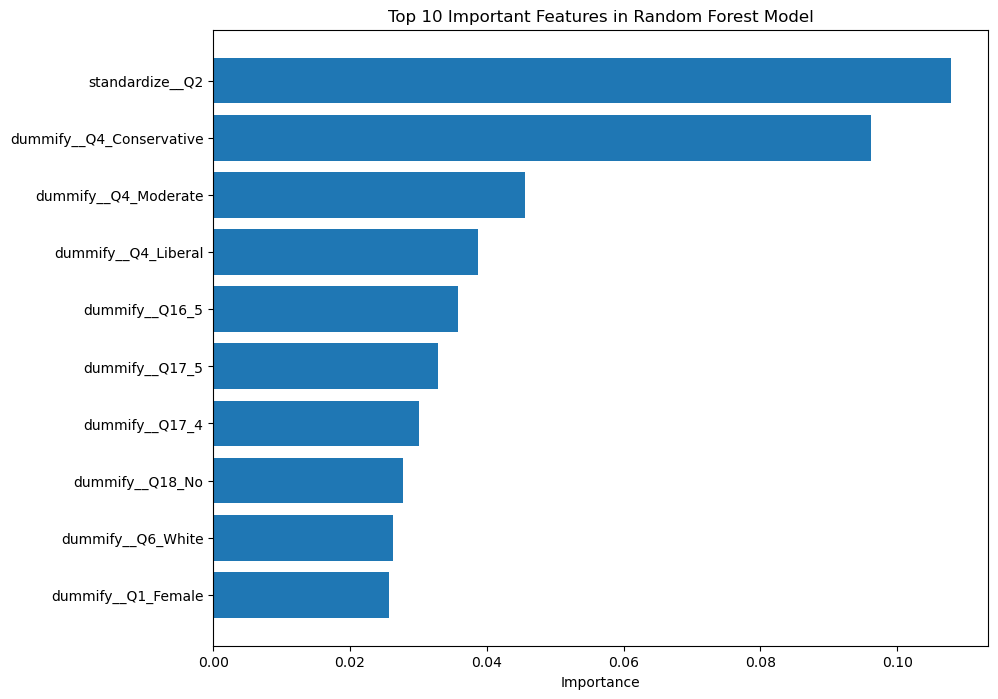

In [36]:
import matplotlib.pyplot as plt

# Extracting the feature names and their importances for plotting
feature_names, importances = zip(*important_features)

# Creating a bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Define the pipeline
xgb_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("XGB", xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ]
)

# Encode target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit the model with encoded labels
xgb_model = xgb_pipeline.fit(X, y_encoded)

# Fit the model
xgb_model = xgb_pipeline.fit(X, y_encoded)

# Evaluate the model using cross-validation
scores_xgb = cross_val_score(xgb_pipeline, X, y_encoded, cv=5, scoring='accuracy')
xgb_acc = scores_xgb.mean()
print(f"XGBoost Accuracy Score: {xgb_acc}")



XGBoost Accuracy Score: 0.574331550802139


In [18]:
# Get feature importances
def get_feature_importance(pipeline, column_transformer):
    # Get the feature names after transformation
    transformed_features = column_transformer.get_feature_names_out()
    
    # Get the feature importances from the xgboost model
    importances = pipeline.named_steps['XGB'].feature_importances_
    
    # Create a series with feature names and their importance scores
    feature_importances = pd.Series(importances, index=transformed_features)
    
    # Return the 10 most significant variables
    return feature_importances.nlargest(10)

# Print the 10 most significant variables
significant_variables = get_feature_importance(xgb_pipeline, ct)
print("Top 10 significant variables:")
print(significant_variables)


Top 10 significant variables:
dummify__Q4_Conservative            0.138530
dummify__Q15_2                      0.070722
dummify__Q6_Black                   0.069351
dummify__Q15_1                      0.065997
dummify__Q17_1                      0.049444
dummify__Q17_2                      0.038340
dummify__Q10_Yes, very religious    0.035985
dummify__Q14_Less Willing           0.035930
dummify__Q6_White                   0.034372
dummify__Q16_4                      0.031887
dtype: float32


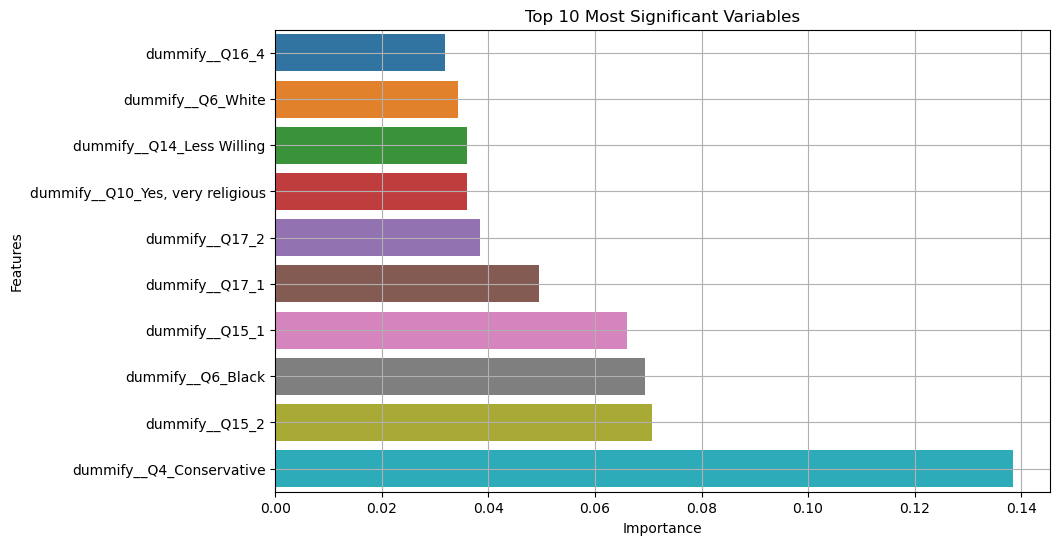

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_significant_variables(significant_variables):
    # Sort the Series to ensure the plot is ordered
    sorted_vars = significant_variables.sort_values()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_vars.values, y=sorted_vars.index)
    
    # Add plot labels and title
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Most Significant Variables')
    plt.grid(True)

    # Display the plot
    plt.show()

# Assuming `significant_variables` contains the 10 most significant features
plot_significant_variables(significant_variables)


In [38]:
test_data = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Final\Classification\CAH-201803-test.csv")
# Convert columns to categorical as needed
categorical_columns = test_data.columns.drop(['id_num', 'Q2'])
test_data[categorical_columns] = test_data[categorical_columns].astype('category')
test_data.head()

,id_num,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,2,Female,78,Conservative,College degree,White,Yes,Yes,No,"Yes, very religious",Pro-Choice,Yes,Yes,Behave no differently,4,5,1,Yes
1,3,Male,59,Moderate,High school or less,Black,Yes,Yes,Yes,"Yes, very religious",Pro-Choice,No,No,More Willing,5,4,5,No
2,4,Male,59,Moderate,High school or less,White,Yes,No,Yes,"Yes, very religious",Pro-life,Yes,No,Behave no differently,4,5,1,Yes
3,6,Male,52,Moderate,Graduate degree,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-Choice,No,Yes,Less Willing,5,4,4,No
4,11,Female,33,Moderate,High school or less,White,No,No,Yes,"Yes, somewhat religious",Pro-Choice,No,No,More Willing,5,5,4,Yes


In [39]:
X_test = test_data.drop("id_num",axis=1)

In [40]:
final_predictions = pd.DataFrame(
    {"id_num": test_data['id_num'],
    "political_affiliation_predicted": lda_model.predict(X_test)}
)
final_predictions

,id_num,political_affiliation_predicted
0,2,Republican
1,3,Democrat
2,4,Independent
3,6,Republican
4,11,Independent
...,...,...
161,327,Democrat
162,330,Independent
163,331,Democrat
164,333,Independent
